# Телеком — задача проекта

Оператор связи «Ниединогоразрыва.ком» хочет научиться прогнозировать отток клиентов. Если выяснится, что пользователь планирует уйти, ему будут предложены промокоды и специальные условия. Команда оператора собрала персональные данные о некоторых клиентах, информацию об их тарифах и договорах.

### Описание услуг

Оператор предоставляет два основных типа услуг:

1. Стационарную телефонную связь. Возможно подключение телефонного аппарата к нескольким линиям одновременно.
2. Интернет. Подключение может быть двух типов: через телефонную линию (DSL*,* от англ. *digital subscriber line*, «цифровая абонентская линия») или оптоволоконный кабель (*Fiber optic*).  

Также доступны такие услуги:

- Интернет-безопасность: антивирус (*DeviceProtection*) и блокировка небезопасных сайтов (*OnlineSecurity*);
- Выделенная линия технической поддержки (*TechSupport*);
- Облачное хранилище файлов для резервного копирования данных (*OnlineBackup*);
- Стриминговое телевидение (*StreamingTV*) и каталог фильмов (*StreamingMovies*).

За услуги клиенты могут платить каждый месяц или заключить договор на 1–2 года. Доступны различные способы расчёта и возможность получения электронного чека.

##  1.Исследование  данных  
(импорты будут добавляться)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score, make_scorer, accuracy_score
from sklearn.metrics import roc_curve, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils import shuffle
from sklearn.model_selection import GridSearchCV
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import KFold

In [ ]:
try:
    df_1 = pd.read_csv(r'C:\Users\katze\anaconda3\Projects\FinalProject\datasets/phone_new.csv')
    df_2 = pd.read_csv(r'C:\Users\katze\anaconda3\Projects\FinalProject\datasets/personal_new.csv')
    df_3 = pd.read_csv(r'C:\Users\katze\anaconda3\Projects\FinalProject\datasets/internet_new.csv')
    df_4 = pd.read_csv(r'C:\Users\katze\anaconda3\Projects\FinalProject\datasets/contract_new.csv')

except:
    df_1 = pd.read_csv('/datasets/phone_new.csv')
    df_2 = pd.read_csv('/datasets/personal_new.csv')
    df_3 = pd.read_csv('/datasets/internet_new.csv')
    df_4 = pd.read_csv('/datasets/contract_new.csv')


Читаем датасеты и выводим информацию.

In [ ]:
df_1.head()

,customerID,MultipleLines
0,5575-GNVDE,No
1,3668-QPYBK,No
2,9237-HQITU,No
3,9305-CDSKC,Yes
4,1452-KIOVK,Yes


In [ ]:
df_2.head()

,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No


In [ ]:
df_3.head()


,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,Fiber optic,No,No,No,No,No,No


In [ ]:
df_4.head()

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,31.04
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,2071.84
2,3668-QPYBK,2019-10-01,No,Month-to-month,Yes,Mailed check,53.85,226.17
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1960.6
4,9237-HQITU,2019-09-01,No,Month-to-month,Yes,Electronic check,70.70,353.5


In [ ]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6361 entries, 0 to 6360
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     6361 non-null   object
 1   MultipleLines  6361 non-null   object
dtypes: object(2)
memory usage: 99.5+ KB


In [ ]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     7043 non-null   object
 1   gender         7043 non-null   object
 2   SeniorCitizen  7043 non-null   int64 
 3   Partner        7043 non-null   object
 4   Dependents     7043 non-null   object
dtypes: int64(1), object(4)
memory usage: 275.2+ KB


In [ ]:
df_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5517 entries, 0 to 5516
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        5517 non-null   object
 1   InternetService   5517 non-null   object
 2   OnlineSecurity    5517 non-null   object
 3   OnlineBackup      5517 non-null   object
 4   DeviceProtection  5517 non-null   object
 5   TechSupport       5517 non-null   object
 6   StreamingTV       5517 non-null   object
 7   StreamingMovies   5517 non-null   object
dtypes: object(8)
memory usage: 344.9+ KB


In [ ]:
df_4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
dtypes: float64(1), object(7)
memory usage: 440.3+ KB


In [ ]:
df_1.describe()

,customerID,MultipleLines
count,6361,6361
unique,6361,2
top,5575-GNVDE,No
freq,1,3390


In [ ]:
df_2.describe()

,SeniorCitizen
count,7043.000000
mean,0.162147
std,0.368612
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [ ]:
df_3.describe()

,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
count,5517,5517,5517,5517,5517,5517,5517,5517
unique,5517,2,2,2,2,2,2,2
top,7590-VHVEG,Fiber optic,No,No,No,No,No,No
freq,1,3096,3498,3088,3095,3473,2810,2785


In [ ]:
df_4.describe()

,MonthlyCharges
count,7043.000000
mean,64.761692
std,30.090047
min,18.250000
25%,35.500000
50%,70.350000
75%,89.850000
max,118.750000


### Проверяем на количество пропусков

In [ ]:
df_1.isna().sum()

customerID       0
MultipleLines    0
dtype: int64

In [ ]:
df_2.isna().sum()

customerID       0
gender           0
SeniorCitizen    0
Partner          0
Dependents       0
dtype: int64

In [ ]:
df_3.isna().sum()

customerID          0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
dtype: int64

In [ ]:
df_4.isna().sum()

customerID          0
BeginDate           0
EndDate             0
Type                0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
dtype: int64

Пропуски отсутствуют, идем дальше, построим графики по каждому датасету

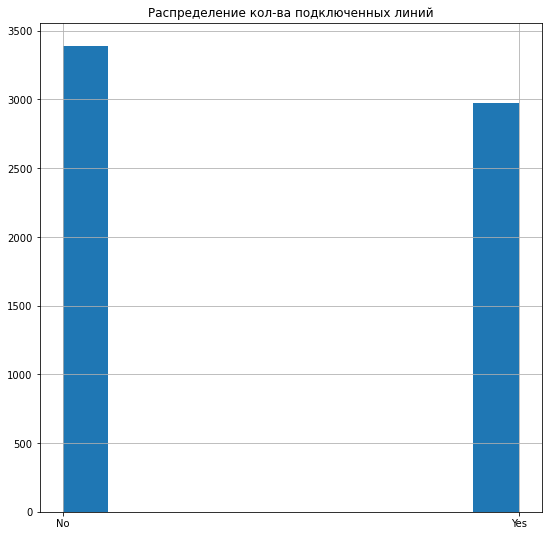

In [ ]:
df_1['MultipleLines'].hist(figsize=(9,9))
plt.title('Распределение кол-ва подключенных линий')
plt.show()


Клиентов подключенных по нескольким сетям меньше

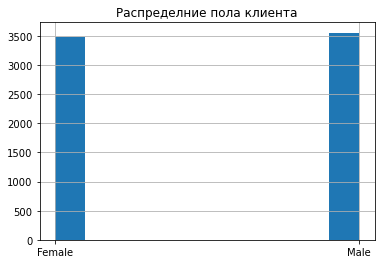

In [ ]:
df_2['gender'].hist()
plt.title('Распределние пола клиента')
plt.show()

Соотношение мужчин и женин примерно одинаковое

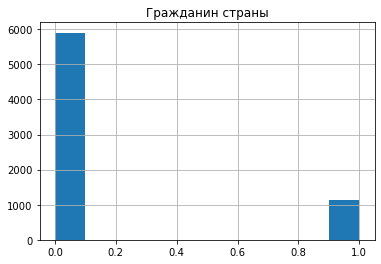

In [ ]:
df_2['SeniorCitizen'].hist()
plt.title('Гражданин страны')
plt.show()

Всего лишь 20% являются граждаными города

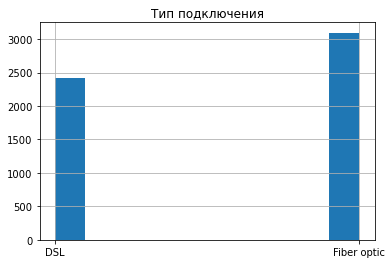

In [ ]:
df_3['InternetService'].hist()
plt.title('Тип подключения')
plt.show()

По оптике подключено больше клиентов, оптоволкно сейчас дает больше скоростных возможностей.

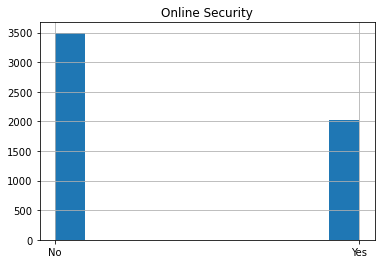

In [ ]:
df_3['OnlineSecurity'].hist()
plt.title('Online Security')
plt.show()

Мало кто пользуется защитой интернет соединения от провайдера.

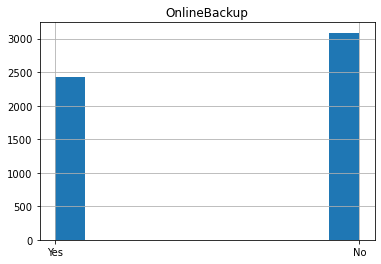

In [ ]:
df_3['OnlineBackup'].hist()
plt.title('OnlineBackup')
plt.show()

Почти 40% пользуется облачными сервисами

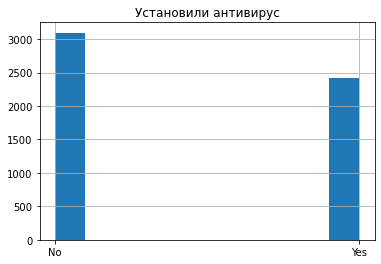

In [ ]:
df_3['DeviceProtection'].hist()
plt.title('Установили антивирус')
plt.show()

Антивирусом не пользуется большая часть клиентов.

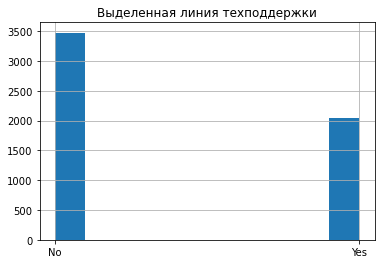

In [ ]:
df_3['TechSupport'].hist()
plt.title('Выделенная линия техподдержки')
plt.show()

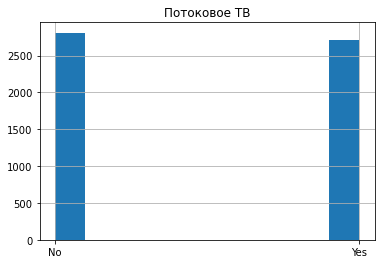

In [ ]:
df_3['StreamingTV'].hist()
plt.title('Потоковое ТВ')
plt.show()

Потоковым ТВ пользуеся примерно половина и половина не пользуется.

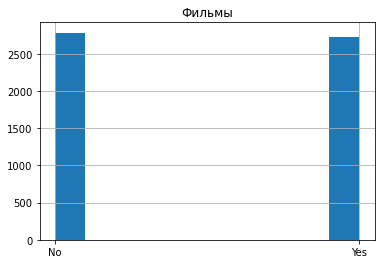

In [ ]:
df_3['StreamingMovies'].hist()
plt.title('Фильмы')
plt.show()

Ровно как и потоковыми фильмами

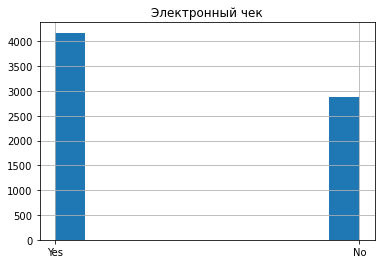

In [ ]:
df_4['PaperlessBilling'].hist()
plt.title('Электронный чек')
plt.show()

Примерно 60% клиентов отказались от бумажных чеков, берегут природу

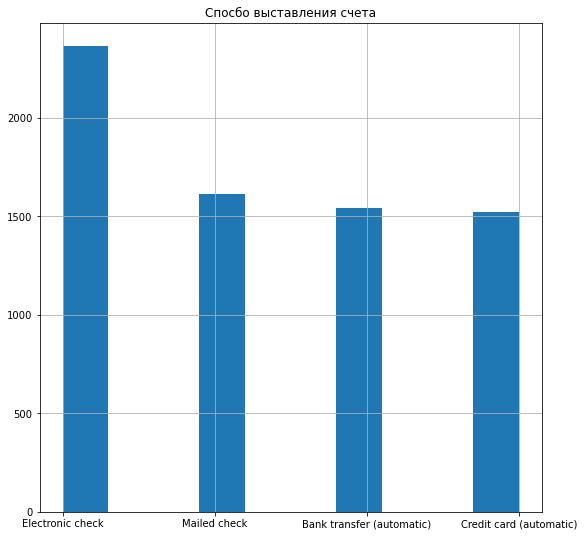

In [ ]:
df_4['PaymentMethod'].hist(figsize=(9,9))
plt.title('Спосбо выставления счета')
plt.show()

Чаще клиенты предпочитают получать счет на емэйл, меньше в бумажном виде, у остальных подлюкчен автоплатеж.

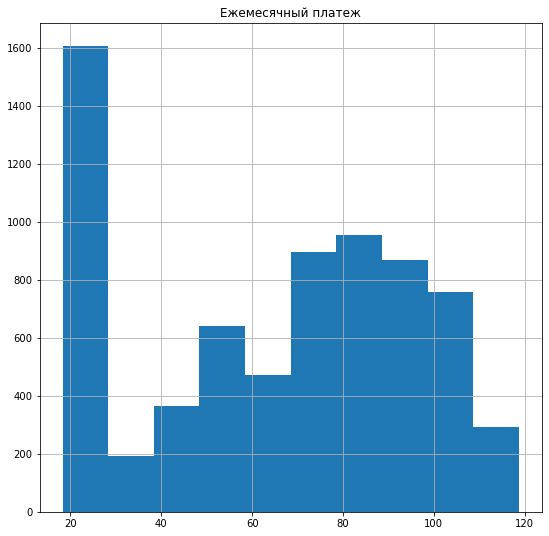

In [ ]:
df_4['MonthlyCharges'].hist(figsize=(9,9))
plt.title('Ежемесячный платеж')
plt.show()

Как видно из графика, мы видим подтверждение предыдущих графиков, где люди не пользуются дополнительными продуктами от провайдера и платят только за интернет.

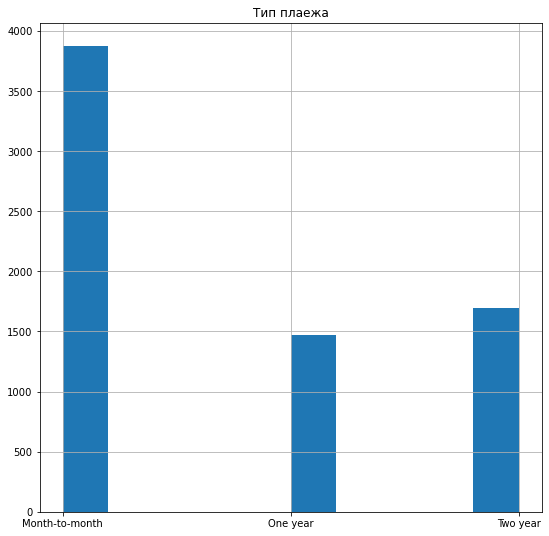

In [ ]:
df_4['Type'].hist(figsize=(9,9))
plt.title('Тип плаежа')
plt.show()

Больщинство клиентом предпочитает ежемесячную оплату, меньше платят сразу год, чуть больше клиентов оплачивают сразу за 2 года - постоянные клиенты, скорее всего кто расчитывает на долгосрочное сотруничество.

Мы выгрузли данные по каждому датасету, познакомились с ними. Проверили на наличие пропусков, тип данных, построили графики по главным столбцам каждого датасета, чтобы визуально определить тип клиентов, какими продуктами чаще всего пользуются от интернет-провайдера. Увидели предпочтительный способ оплаты и получения счета. Дальнейшая наша задача будет определить самого "нелояльного клиента" который платит по месяцам, дабы возможно пробный период, либо с дальнейшими намерениями переключить на более дешевого провайдера, и который соответственно возможно, не пользуеся ни одним доп.продуктов провайдера, по поведению которого нам нужно обучить модель, для предсказания оттока клиентов.

## 2. Предобработка данных

Предобработку данных начнем с объединения всех таблиц в одну по ключу customer_id

In [ ]:
df_full = pd.merge(df_2,df_4, on = 'customerID', how = 'left')

In [ ]:
df_full = pd.merge(df_full, df_1, on='customerID', how='left')

In [ ]:
df_full = pd.merge(df_full, df_3, on = 'customerID', how='left')

После объединения выведем основную информацию по новой таблице.

In [ ]:
df_full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   BeginDate         7043 non-null   object 
 6   EndDate           7043 non-null   object 
 7   Type              7043 non-null   object 
 8   PaperlessBilling  7043 non-null   object 
 9   PaymentMethod     7043 non-null   object 
 10  MonthlyCharges    7043 non-null   float64
 11  TotalCharges      7043 non-null   object 
 12  MultipleLines     6361 non-null   object 
 13  InternetService   5517 non-null   object 
 14  OnlineSecurity    5517 non-null   object 
 15  OnlineBackup      5517 non-null   object 
 16  DeviceProtection  5517 non-null   object 


In [ ]:
df_full.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
BeginDate            object
EndDate              object
Type                 object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
dtype: object

Для удобства чтения и написания кода, приведем названия столбцов к нижнему регистру

In [ ]:
df_full.columns = df_full.columns.str.lower()

In [ ]:
df_full.isna().sum()

customerid             0
gender                 0
seniorcitizen          0
partner                0
dependents             0
begindate              0
enddate                0
type                   0
paperlessbilling       0
paymentmethod          0
monthlycharges         0
totalcharges           0
multiplelines        682
internetservice     1526
onlinesecurity      1526
onlinebackup        1526
deviceprotection    1526
techsupport         1526
streamingtv         1526
streamingmovies     1526
dtype: int64

После объединения таблиц, в бывшей таблице internet образовались пропуски, причем одинаковое кол-во, возможно на дату создания анкеты не было информации по этим клиентам подключили они доп.продукты или не подключили их вообще. В таблице internet во всех столбцах о доп продуктах интернет провайдера были значения "Yes" и "No", значит логичнее будет заполнить пропуски в этих солбцах значением "No". А также в графе totalcharges тип object,  надо исправить на float64

In [ ]:
df_full['totalcharges'].unique()

array(['31.04', '2071.84', '226.17', ..., '325.6', '520.8', '7251.82'],
      dtype=object)

In [ ]:
(df_full['totalcharges']== ' ').sum()

11

Оказывается по мимо типа данных есть еще проблема в в значении "...", что мешает нам перевести данные, таких случаев всего 11, избавимся от них

In [ ]:
df_full = df_full[df_full['totalcharges'] != ' ']

In [ ]:
df_full['totalcharges'] = df_full['totalcharges'].astype('float64')

In [ ]:
df_full['multiplelines'] = df_full['multiplelines'].fillna('No')

In [ ]:
df_full['internetservice'] = df_full['internetservice'].fillna('No')

In [ ]:
df_full['onlinesecurity'] = df_full['onlinesecurity'].fillna('No')

In [ ]:
df_full['onlinebackup'] = df_full['onlinebackup'].fillna('No')

In [ ]:
df_full['deviceprotection'] = df_full['deviceprotection'].fillna('No')

In [ ]:
df_full['techsupport'] = df_full['techsupport'].fillna('No')

In [ ]:
df_full['streamingtv'] = df_full['streamingtv'].fillna('No')

In [ ]:
df_full['streamingmovies'] = df_full['streamingmovies'].fillna('No')

In [ ]:
df_full.isna().sum()

customerid          0
gender              0
seniorcitizen       0
partner             0
dependents          0
begindate           0
enddate             0
type                0
paperlessbilling    0
paymentmethod       0
monthlycharges      0
totalcharges        0
multiplelines       0
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
dtype: int64

Пропуски заполнены

In [ ]:
df_full['begindate'].value_counts()

2014-02-01    366
2019-10-01    237
2019-11-01    237
2019-09-01    237
2020-01-01    233
             ... 
2016-11-01     50
2014-01-01      7
2013-10-01      3
2013-12-01      3
2013-11-01      2
Name: begindate, Length: 76, dtype: int64

In [ ]:
df_full['enddate'].value_counts()

No            5931
2020-01-01      39
2019-12-01      38
2018-11-01      35
2019-09-01      32
              ... 
2014-09-01       2
2014-12-01       2
2014-06-01       1
2014-10-01       1
2014-11-01       1
Name: enddate, Length: 67, dtype: int64

В столбце enddate по мимо даты есть значение "No" - это означает, что клиент еще не ушел из компании. Предлагаю посмотреть, как долго клиенты были клиентами компании до ухода. Для этого переведем типа данных в этих столбцах в DateTime, т.к. в столбце endate есть значение No, то это значение забьем заглушкой, равной датой актуальности данных, по условию это 2020-02-01, перед этим зададим целевой признак, по которму модель будет определять факт воможного ухода клиента, соответственно, нам нужно создать еще один столбец, в которм будут значения 1 и 0, ушел клиент или нет, соответственно.

In [ ]:
df_full['purpose'] = df_full.apply(lambda x: 0 if x.enddate =='No' else 1, axis =1)

Посмотрим, сколько клиентов ушло

<div class="alert alert-block alert-success"; style="border-left: 6px solid green">
<b>Комментарий тимлида V2 ✔️</b>
       
С целевым разобрались!
    
</div>


In [ ]:
df_full['purpose'].value_counts()

0    5931
1    1101
Name: purpose, dtype: int64

In [ ]:
len(df_full[(df_full['purpose'] == 1)])/len(df_full['purpose'])*100

15.656996587030717

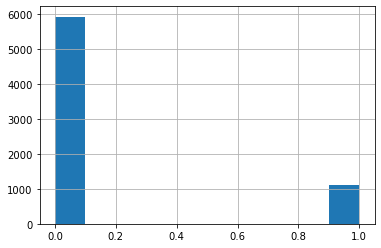

In [ ]:
df_full['purpose'].hist()
plt.show()

Наблюдаем дисбаланс классов

In [ ]:
df_full['begindate'] = df_full['begindate'].astype('datetime64')

In [ ]:
date = '2020-02-01'

In [ ]:
df_full.loc[df_full['enddate'] == 'No', 'enddate'] = date

In [ ]:
df_full['enddate'] = df_full['enddate'].astype('datetime64')

In [ ]:
df_full['ratio'] = (df_full['enddate']- df_full['begindate']).dt.days

C:\Users\katze\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


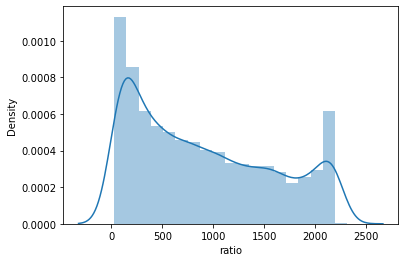

In [ ]:
sns.distplot(df_full['ratio'])
plt.show()

Выведем новую таблицу

In [ ]:
df_full.head()

,customerid,gender,seniorcitizen,partner,dependents,begindate,enddate,type,paperlessbilling,paymentmethod,...,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,purpose,ratio
0,7590-VHVEG,Female,0,Yes,No,2020-01-01,2020-02-01,Month-to-month,Yes,Electronic check,...,No,DSL,No,Yes,No,No,No,No,0,31
1,5575-GNVDE,Male,0,No,No,2017-04-01,2020-02-01,One year,No,Mailed check,...,No,DSL,Yes,No,Yes,No,No,No,0,1036
2,3668-QPYBK,Male,0,No,No,2019-10-01,2020-02-01,Month-to-month,Yes,Mailed check,...,No,DSL,Yes,Yes,No,No,No,No,0,123
3,7795-CFOCW,Male,0,No,No,2016-05-01,2020-02-01,One year,No,Bank transfer (automatic),...,No,DSL,Yes,No,Yes,Yes,No,No,0,1371
4,9237-HQITU,Female,0,No,No,2019-09-01,2020-02-01,Month-to-month,Yes,Electronic check,...,No,Fiber optic,No,No,No,No,No,No,0,153


Чтобы оценить данные в новом столбце, используем метод describe() чтобы посмотреть минимальное и максимальное количество дней пользования услугами, максимальное кол-во дней, соответствует еще действующим клиентам.

In [ ]:
df_full.describe()

,seniorcitizen,monthlycharges,totalcharges,purpose,ratio
count,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,64.798208,2118.621822,0.156570,899.961320
std,0.368844,30.085974,2112.736199,0.363421,682.738777
min,0.000000,18.250000,19.050000,0.000000,28.000000
25%,0.000000,35.587500,439.745000,0.000000,276.000000
50%,0.000000,70.350000,1345.275000,0.000000,761.000000
75%,0.000000,89.862500,3239.317500,0.000000,1461.000000
max,1.000000,118.750000,9221.380000,1.000000,2314.000000


В среднем пользуются почти 3 года, самое минимальное кол-во дней 0, т.е отключение в день подключения. Очень странно.  

Для дальнейшей работы нам не понадобятся данные из столбцов customer id, начало заключения контракта и дата его окончания,  также суммарные затраты, т.к. мы подсчитали количество дней пользования услугами, поэтому эти данные мы удалим, чтобы наши модели не обучались лишними данными

Также посмотрим на корреляицю числовых признаков

Text(0.5, 1.0, 'Корреляция числовых признаков')

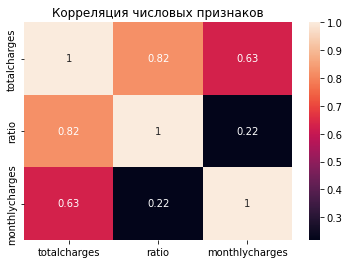

In [ ]:
sns.heatmap(df_full[['totalcharges', 'ratio', 'monthlycharges']].corr(), annot = True)
plt.title('Корреляция числовых признаков')

Между длительностью договора и суммарными затратами сильная корреляция, неудивительно, ведь, чем дольше бользуешься, тем больше платишь, между признаками ежемесячный платеж и суммарные затраты корреляция средняя, корреляция между длительностью договора и ежемесячными платежами низкая

In [ ]:
df_full = df_full.drop(['customerid', 'begindate', 'enddate', 'totalcharges'], axis=1)

In [ ]:
df_full.head()

,gender,seniorcitizen,partner,dependents,type,paperlessbilling,paymentmethod,monthlycharges,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,purpose,ratio
0,Female,0,Yes,No,Month-to-month,Yes,Electronic check,29.85,No,DSL,No,Yes,No,No,No,No,0,31
1,Male,0,No,No,One year,No,Mailed check,56.95,No,DSL,Yes,No,Yes,No,No,No,0,1036
2,Male,0,No,No,Month-to-month,Yes,Mailed check,53.85,No,DSL,Yes,Yes,No,No,No,No,0,123
3,Male,0,No,No,One year,No,Bank transfer (automatic),42.30,No,DSL,Yes,No,Yes,Yes,No,No,0,1371
4,Female,0,No,No,Month-to-month,Yes,Electronic check,70.70,No,Fiber optic,No,No,No,No,No,No,0,153


Изменим во всем датафрейме значения Yes & No на 1 и 0 соответственно, для удобства восприятия

In [ ]:
df_full = df_full.replace({'No' : 0, 'Yes' : 1})

In [ ]:
df_full.head(5)

,gender,seniorcitizen,partner,dependents,type,paperlessbilling,paymentmethod,monthlycharges,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,purpose,ratio
0,Female,0,1,0,Month-to-month,1,Electronic check,29.85,0,DSL,0,1,0,0,0,0,0,31
1,Male,0,0,0,One year,0,Mailed check,56.95,0,DSL,1,0,1,0,0,0,0,1036
2,Male,0,0,0,Month-to-month,1,Mailed check,53.85,0,DSL,1,1,0,0,0,0,0,123
3,Male,0,0,0,One year,0,Bank transfer (automatic),42.30,0,DSL,1,0,1,1,0,0,0,1371
4,Female,0,0,0,Month-to-month,1,Electronic check,70.70,0,Fiber optic,0,0,0,0,0,0,0,153


Теперь закодируем все признаки, включая числовые

In [ ]:
df_ohe = pd.get_dummies(df_full, drop_first = True)
df_ohe.head()

,seniorcitizen,partner,dependents,paperlessbilling,monthlycharges,multiplelines,onlinesecurity,onlinebackup,deviceprotection,techsupport,...,purpose,ratio,gender_Male,type_One year,type_Two year,paymentmethod_Credit card (automatic),paymentmethod_Electronic check,paymentmethod_Mailed check,internetservice_DSL,internetservice_Fiber optic
0,0,1,0,1,29.85,0,0,1,0,0,...,0,31,0,0,0,0,1,0,1,0
1,0,0,0,0,56.95,0,1,0,1,0,...,0,1036,1,1,0,0,0,1,1,0
2,0,0,0,1,53.85,0,1,1,0,0,...,0,123,1,0,0,0,0,1,1,0
3,0,0,0,0,42.30,0,1,0,1,1,...,0,1371,1,1,0,0,0,0,1,0
4,0,0,0,1,70.70,0,0,0,0,0,...,0,153,0,0,0,0,1,0,0,1


In [ ]:
df_ohe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   seniorcitizen                          7032 non-null   int64  
 1   partner                                7032 non-null   int64  
 2   dependents                             7032 non-null   int64  
 3   paperlessbilling                       7032 non-null   int64  
 4   monthlycharges                         7032 non-null   float64
 5   multiplelines                          7032 non-null   int64  
 6   onlinesecurity                         7032 non-null   int64  
 7   onlinebackup                           7032 non-null   int64  
 8   deviceprotection                       7032 non-null   int64  
 9   techsupport                            7032 non-null   int64  
 10  streamingtv                            7032 non-null   int64  
 11  stre

Разобьем наш датасет на признаки и тренировочную и тестовую выборку

In [ ]:
features = df_ohe.drop('purpose', axis =1)
target = df_ohe['purpose']

In [ ]:
features_train, features_test, target_train, target_test = train_test_split(features,
                                                                           target,
                                                                            test_size = 0.25,
                                                                           random_state = 100423,
                                                                           shuffle = True)

In [ ]:
print(features_train.shape)
print(features_test.shape)

(5274, 21)
(1758, 21)


Числовые признаки масштабируем StandartScaler

In [ ]:
numeric = ['monthlycharges', 'ratio']

In [ ]:
scaler = StandardScaler()
scaler.fit(features_train[numeric])

features_train[numeric] = scaler.transform(features_train[numeric])
features_test[numeric] = scaler.transform(features_test[numeric])

Создадим модель для кросс валидации

In [ ]:
def grid (model, features, target, params):
    roc_auc_scorer = make_scorer(roc_auc_score, greater_is_better = True, needs_threshold = True) #needs_threshold ставим True, тем самым заменяя, что мы считаем predict_proba
    grid = GridSearchCV(model, params, scoring = roc_auc_scorer, cv=5, n_jobs=-1)
    grid.fit(features, target)
    print('Наилучшие гиперпарамеры', grid.best_params_)
    print('ROC_AUC', grid.best_score_)

Логистическая регрессия

In [ ]:
%%time
model_lr = LogisticRegression(random_state = 100423)
lr_param = {'class_weight':['balanced', None], 'C' : [2, 5, 10]}# в параметрах укажем выбор модели с дисбалансом и с балансом
grid(model_lr, features_train, target_train, lr_param )


Наилучшие гиперпарамеры {'C': 5, 'class_weight': None}
ROC_AUC 0.7611786670149254
CPU times: total: 578 ms
Wall time: 11.3 s


Случайный лес

In [ ]:
%%time
model_rf = RandomForestClassifier(random_state = 100423)
rf_param = {'max_depth' : range (1, 15, 1), 'n_estimators': range(5,80, 5)}
grid(model_rf, features_train, target_train, rf_param)

Наилучшие гиперпарамеры {'max_depth': 8, 'n_estimators': 75}
ROC_AUC 0.82215789428293
CPU times: total: 12.3 s
Wall time: 1min 56s


Метрика ROC_AUC модели случайного леса уже лучше и ближе к целевой >=0.85

LightGBM Classifier

In [ ]:
%%time
model_lgbm = LGBMClassifier(boosting_type='gbdt', random_state = 100423)
lgbm_params = {'learning_rate': np.logspace(-3, 0 ,5),
         'n_estimators' : [40, 60],
         'num_leaves' : [31, 41, 51]
}
grid(model_lgbm, features_train, target_train, lgbm_params)

Наилучшие гиперпарамеры {'learning_rate': 0.1778279410038923, 'n_estimators': 60, 'num_leaves': 31}
ROC_AUC 0.8765404680384284
CPU times: total: 2.14 s
Wall time: 12.8 s


CatBoost Classifier

In [ ]:
%%time
model_cb = CatBoostClassifier(random_state = 100423,
                          loss_function = 'CrossEntropy',
                          silent = True)
cb_params = {'learning_rate' : np.logspace(-3, 0, 5),
           'max_depth' : range(2, 11),
             'n_estimators' : [40, 60]
}
grid(model_cb, features_train, target_train, cb_params)

Наилучшие гиперпарамеры {'learning_rate': 1.0, 'max_depth': 2, 'n_estimators': 60}
ROC_AUC 0.8887346379073919
CPU times: total: 5.53 s
Wall time: 2min 25s


На моделях с бустингом мы достигли на обучающей выборке нужного показателя ROC_AUC >=0.85, мелочь, а приятно. ЛУчшей моделью стала CatBoost с метриков ROC_AUC 0,888. Ее будем проверять на тестовой выборке и по ней будем делать важность признаков и матрицу ошибок.

## Тестирование модели

In [ ]:
%%time
cb_test = CatBoostClassifier(learning_rate = 1.0,
                             max_depth = 2,
                             n_estimators = 60,
                            loss_function = 'CrossEntropy',
                            silent = True,
                            random_state = 100423)
cb_test.fit(features_train, target_train)
prediction_test = cb_test.predict(features_test)

probabilities_test = cb_test.predict_proba(features_test)
probabilities_one_test = probabilities_test[:,1]

print('Accuracy', accuracy_score(target_test, prediction_test))
print('ROC_AUC', roc_auc_score(target_test, probabilities_one_test))

Accuracy 0.9129692832764505
ROC_AUC 0.8938066562425778
CPU times: total: 734 ms
Wall time: 348 ms


На тестовой выборке Catboost показал метрику ROC_AUC 0.89

Строим матрицу ошибок и ROC кривую

In [ ]:
confusion_matrix(target_test, prediction_test)



array([[1469,   17],
       [ 136,  136]], dtype=int64)

In [ ]:
fpr, tpr, threshold = roc_curve(target_test, probabilities_one_test)

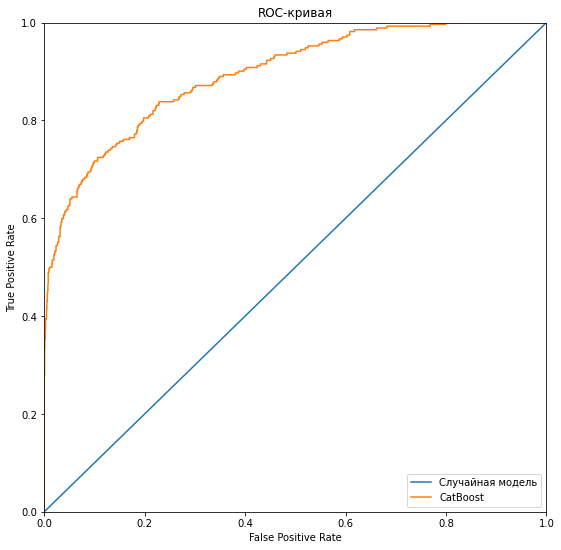

In [ ]:
plt.figure(figsize = (9, 9))

plt.plot([0, 1], [0, 1])
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(('Случайная модель', 'CatBoost'), loc = 'lower right')

plt.title('ROC-кривая')

plt.show()

Посмотрим на важность признаков для модели

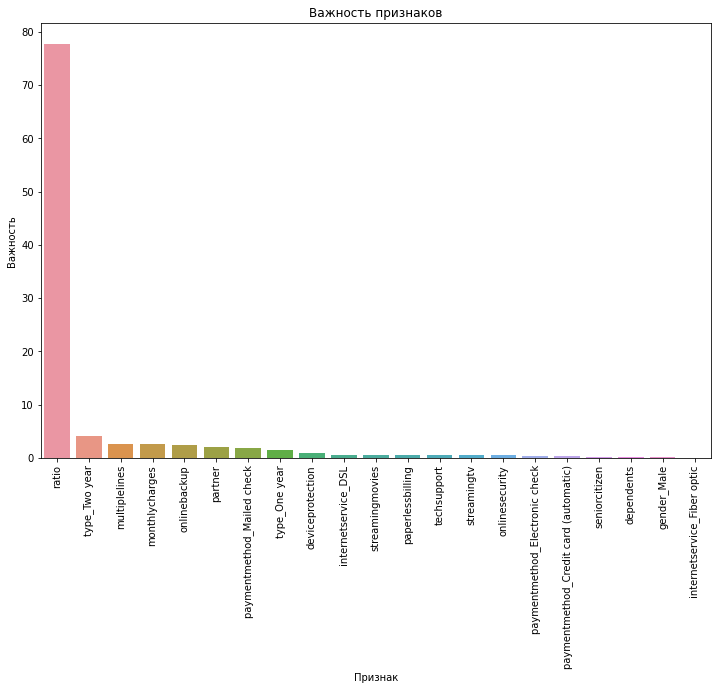

In [ ]:
features_importance = pd.DataFrame(data={'columns': features_train.columns,
                                        'importance' : cb_test.feature_importances_
                                        }).sort_values(by='importance', ascending= False)
plt.figure(figsize=(12,8))
sns.barplot(x=features_importance['columns'], y=features_importance['importance'])
plt.title('Важность признаков')
plt.xticks(rotation='vertical')
plt.xlabel('Признак')
plt.ylabel('Важность')
plt.show()

Как видно из графика, наиболее важным признаком для предскаания модели является длительность действия договора.

## Отчет проекта

Мы выгрузли данные по каждому датасету, познакомились с ними. Проверили на наличие пропусков, тип данных, построили графики по главным столбцам каждого датасета, чтобы визуально определить тип клиентов, какими продуктами чаще всего пользуются от интернет-провайдера. Увидели предпочтительный способ оплаты и получения счета. Дальнейшая наша задача будет определить самого "нелояльного клиента" который платит по месяцам, дабы возможно пробный период, либо с дальнейшими намерениями переключить на более дешевого провайдера, и который соответственно возможно, не пользуеся ни одним доп.продуктов провайдера, по поведению которого нам нужно обучить модель, для предсказания оттока клиентов.

Мы объединили все датасеты по ключу CustomerID, для простоты восприятия, присоединение начали с датасета данных клиентов и интерент продуктов, дабы избежать утечки данных, в остальных датасетах после присоединения образовались пропуски, а именно в доп продуктах провайера, их мы заполнили значением "NO"

При исследовании данных выявили, что в столбце totalcharges присутствуют пустые значения, их мы удалили, т.к. их всего 11 штук, на общую информацию они не повлияют.

Создали новый признак - длительность договора, путем подсчета разницы между окончанием договора и датой его подписания, графы, где договор не закончился, заполнили значение актуальной датой данных.

Создали целевой признак - по столбцу окончание договора, и присвоили занчение 1 и 0, если клиент ушел и еще является клиентом.

После создания целевого признака, сделали проверку на дисбаланс классов, определили, что всего лишь 1/6 часть клиентов ушло.

Удалили ненужные нам признаки для дальнейшего построения и обучения моделей, а именно начало и конец договора, суммарные затраты и индек клиента.

Бинарным значениям "YES" & "NO" присвоили числовые значения 1 и 0 соответственно, для простоты обучения, категориальные признаки (Тип оплаты, получения счета и тип подключения) мы закодировали в числовые и срзу сделали проверку на утечку данных.

Далее мы поделили данные на тренировочную и тестовую выборки, числовые признаки отмасштабировали.

Создали функцию для обучения моделей на кросс валидации. Для прогнозирования выбрали 4 модели: Логистическая регрессия, случайнй лес и 2 модели бустинга - это LGBM и CatBoost. Метрику выбрали ROC_AUC, целевое значение не ниже 0,85 на тренировочной выборке. 2 модели достигли этого значения - это модели LGBM  и CatBoost, 0.87 и 0,88 соответственно. Лучше моделью стал CatBoost, ее мы проверили на тестовой выборке, результат оказался 0,89. Цель по метрике мы достигли.

Затем мы созали матрицу ошибок и построили ROC кривую по отношению к случайной линейном модели. И определили важность признаков для лучшей модели, самым важным оказался длительность договора, который мы получили переведя занчения столбцов начало и конец договора в тип datetime64, и итоговое значение длительности договора перевели в дни.

Все пункты плана проекта выполнены. Целевое значение получено, модели обучены, определена лучшая из них и проверена на тестовой выборке.




Гиперпараметры лучшей модели : 'learning_rate': 1.0, 'max_depth': 2, 'n_estimators': 60

Признаки, на которых обучалась модель выведим в виде таблицы

In [ ]:
display(features_importance)

,columns,importance
12,ratio,77.798474
15,type_Two year,4.077256
5,multiplelines,2.655919
4,monthlycharges,2.532158
7,onlinebackup,2.392676
1,partner,2.084885
18,paymentmethod_Mailed check,1.856226
14,type_One year,1.402518
8,deviceprotection,0.888245
19,internetservice_DSL,0.599564
